In [78]:
import numpy as np
from matplotlib import pyplot as plt 

# Scipy

While numpy provides all of our core numerical support, Scipy provides layers of more specialized routines for scientific computing. These include routines for numerical integration, optimization, interpolation, and statistics. We will just do a few quick things with it here and I will depend on you to wade through the [documentation](https://docs.scipy.org/doc/scipy/reference/).

## Scipy for stats
The `scipy.stats` module provides many basic statistical tests that you can use on a day to day basis, such as a T-test or Fisher's exact test. Let's create some data, visualize it, and then use scipy to do some descriptive statistics and statistical testing. 

We will start by creating two sets of normally distributed data with different means.

In [ ]:
import scipy as sp
from scipy import stats as spStats

#generate the RVs using numpy
#x1 = np.random.normal(0,1,1000)
#x2 = np.random.normal(2,1,1000)
#h= plt.hist([x1,x2],bins=24,alpha=0.5)

#can do the same thing using scipy
x1 = sp.stats.norm.rvs(loc=0,scale=1,size=1000) # loc = mean, scale = stdev
x2 = sp.stats.norm.rvs(loc=2,scale=1,size=1000)

#visualize using a histogram
h= plt.hist([x1,x2],bins=24,alpha=0.5)


`describe()` gives us a convenient way to get a quick look at quantities like the mean and variance of a vector of data

In [ ]:
print("x1 stats")
print(sp.stats.describe(x1))
print("x2 stats")
print(sp.stats.describe(x2))


Now let's do a T-test for the difference in means between `x1` and `x2`

In [ ]:
#T-tests are easy to do
ttest = sp.stats.ttest_ind(x1,x2)
print(ttest)


We can do plenty of tests along these lines. For instance I always like the non-parametric Mann-Whitney test that looks for differences in the rank order among two samples

In [ ]:
mwu = sp.stats.mannwhitneyu(x1,x2)
print(mwu)

## Scipy for numerical optimization
A classic thing that comes up in scientific programming again and again is optimization-- that is finding the maximumum or minimum of a function. In statistics, the function of interest is often what is known as the likelihood function, that is the probability of data given a parameterized model. scipy gives us out of the box routines for doing this optimization for us.



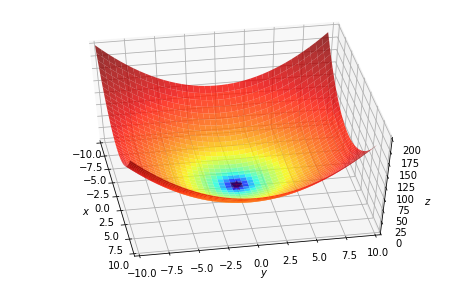

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

def sphere(x,y):
    return(x**2+y**2)

xmin,xmax = -10,10
x, y = np.meshgrid(np.arange(xmin, xmax, 0.5), np.arange(xmin, xmax, 0.5))
z = sphere(x,y)

minima = np.array([0,0])
minima_ = minima.reshape(-1, 1)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-10)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

ax.plot(*minima_, sphere(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((xmin, xmax))

plt.show()

In [141]:
sphere(-6,4)

52

In [10]:
def proposeMove(xmin,xmax,ymin,ymax,function):
    x_prime = np.random.uniform(xmin,xmax)
    y_prime = np.random.uniform(ymin,ymax)
    return((x_prime,y_prime,function(x_prime,y_prime)))

           

    

In [11]:
delta = 1
x_min = -10
y_min = 2
f_curr = sphere(x_min,y_min)
f_prop = 1000
res = [[x_min,y_min,f_curr,delta]]
nfev = 0
while(delta > 1e-04):
    x_prop, y_prop, f_prop = proposeMove(xmin,xmax,xmin,xmax,sphere)
    nfev+=1
    if f_prop <= f_curr:
        x_min = x_prop
        y_min = y_prop
        delta = f_curr - f_prop
        f_curr = f_prop
        res.append([x_min,y_min,f_curr,delta])
print("function evaluations: ",nfev)
print("x: ",x_min," y: ",y_min)
    

function evaluations:  2906014
x:  0.0027808088598408887  y:  0.006018591566734344


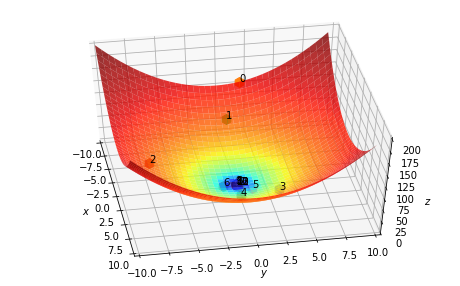

In [12]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-10)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

#ax.plot(*minima_, sphere(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((xmin, xmax))
step=0
for aPoint in res:
    ax.plot([aPoint[0]],[aPoint[1]], [aPoint[2]], 'h', markersize=10)
    #print(aPoint[0], aPoint[1], str(step))
    ax.text(aPoint[0], aPoint[1], aPoint[2], str(step))
    step+=1

plt.show()


Now let's do the same thing using scipy

In [13]:
#from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize

#redefine sphere function to play well with the optimizer
def sphere2(x):
    return(x[0]**2+x[1]**2)

startPt = [-10, 2]
res = minimize(sphere2, x0=startPt, method='Nelder-Mead',
            tol=1e-4, callback=print)
res

[-9.    2.15]
[-8.5    2.025]
[-6.25    2.2625]
[-4.125    2.13125]
[1.4375   2.540625]
[1.4375   2.540625]
[-0.8125    2.303125]
[-0.8125    2.303125]
[-0.8125    2.303125]
[0.6875   2.328125]
[-0.5625    2.040625]
[-0.5625    2.040625]
[-0.8125    1.503125]
[-0.8125    1.503125]
[0.09375   1.0515625]
[0.09375   1.0515625]
[0.0625   0.184375]
[0.0625   0.184375]
[0.0625   0.184375]
[0.0625   0.184375]
[0.0625   0.184375]
[ 0.02941895 -0.13362427]
[-0.10778809  0.05888062]
[0.01165771 0.07350159]
[-0.00932312 -0.03371658]
[-0.00932312 -0.03371658]
[0.01740932 0.02842126]
[-0.02175784 -0.00417072]
[-0.00574869 -0.01079566]
[0.00182803 0.01046904]
[0.00793843 0.00184039]
[-0.00043273 -0.00232047]
[-0.00043273 -0.00232047]
[-0.00043273 -0.00232047]
[-0.00010814  0.00221554]
[-0.00010814  0.00221554]
[ 0.00105713 -0.00030399]
[ 2.08823712e-05 -6.82347508e-04]
[ 2.08823712e-05 -6.82347508e-04]
[-0.00035133  0.00028612]
[2.51042472e-05 3.31537077e-04]
[-7.11153944e-05 -1.86758533e-04]
[ 1.41

 final_simplex: (array([[-5.47697556e-06, -1.41911455e-05],
       [ 6.19398987e-06,  4.77076288e-05],
       [-4.25962122e-05,  4.42956172e-05]]), array([2.31385871e-10, 2.31438336e-09, 3.77653900e-09]))
           fun: 2.313858714219231e-10
       message: 'Optimization terminated successfully.'
          nfev: 94
           nit: 49
        status: 0
       success: True
             x: array([-5.47697556e-06, -1.41911455e-05])

## Reading and writing data
A quick note on reading and writing data using pure numpy / scipy-- it's very easy. Let's simulate a dataset, write it to disk, then read it again to demonstrate

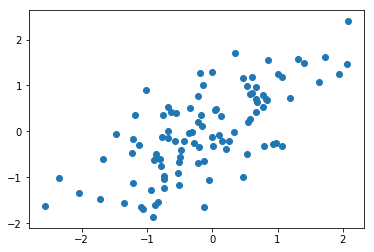

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# simulate X ~ MVN([0,0],[[1,0.7],[0.7,1]])
X = np.random.multivariate_normal([0,0],[[1,0.7],[0.7,1]],100)
plt.scatter(X[:,0],X[:,1])
plt.show()

Next we will write out the data and read it back in stored as a new variable name. There are many options when writing out data to disk that mostly breaks along the lines of what file format do you want. There are two options to consider: writing out data as plain text or writing as binary. Plain text writes larger files that are human readable. Binary output won't be readable, but the files will be much much smaller. I'd recommend using plain text if you consider yourself to be new to programming / dealing with file systems. 


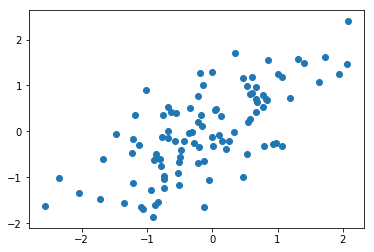

In [7]:
#write 
np.savetxt("foo.txt",X)
Y = np.loadtxt("foo.txt")
plt.scatter(Y[:,0],Y[:,1])
plt.show()

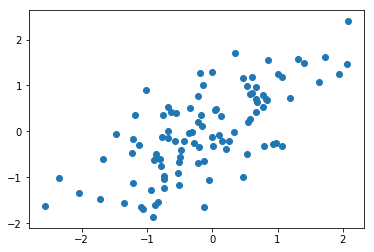

In [14]:
#write as gzip compressed
np.savetxt("foo.gz",X)
Y1 = np.loadtxt("foo.gz")
plt.scatter(Y1[:,0],Y1[:,1])
plt.show()

# Pandas
The pandas library provides an amazingly rich set of tools for data inport, export, cleaning, and more. We will use it here for bringing in a large dataset of insect egg morphometrics that was recently preprinted in this [paper](https://www.biorxiv.org/content/early/2018/11/19/471953?rss=1). The authors have deposited the data into a convential [github repo](https://github.com/shchurch/Insect_Egg_Evolution) for people like us to play with. I've already gone ahead and downloaded the data to the repo for this class and put it within the notebooks directory

In [17]:
import pandas as pd
from pandas import Series, DataFrame


the two main data structes that pandas adds for us are `Series` and `DataFrame`. `Series` is a one dimensionsal array-like object that contains an array of data and an associated array of data labels, called its *index*. We can create a Series from a list of data

In [18]:
aSer = Series([4,3,8,-9])
aSer

0    4
1    3
2    8
3   -9
dtype: int64

the default behavior is to set the index for the observations we hand it from the integers 0 through n-1. We can query both the index and the values of our series


In [23]:
print(aSer.values)
print(aSer.index)

[ 4  3  8 -9]
RangeIndex(start=0, stop=4, step=1)


we can also manually set the index of our data if we so choose

In [25]:
aSer = Series([4,3,8,-9],index=['a','b','c','d'])
aSer

a    4
b    3
c    8
d   -9
dtype: int64

with this sort of index, we can get values out accordingly directly as well

In [34]:
print(aSer['a'])
bSer = aSer[['a','c']]
print(bSer)
print(type(bSer))

4
a    4
c    8
dtype: int64
<class 'pandas.core.series.Series'>


Series are basically like dicts with a particular order enforced. Indeed it is trivial to go between a dict and a Series-- the keys from the dict are used for the index.

In [36]:
aDict = {'Brooklyn':1, 'Queens':3, 'The Bronx':4, 'Staten Island':5, 'Manhattan':2}
boroSeries = Series(aDict)
boroSeries

Brooklyn         1
Queens           3
The Bronx        4
Staten Island    5
Manhattan        2
dtype: int64

## DataFrames
Series are fine but what makes pandas useful is DataFrames. DataFrames represent spreadsheet-like data for us by containing an ordered collection of columns, each of which can be of it's own data type. DataFrames have an index on rows and columns, and are loosely a dict of Series.

We can quickly set up a small data frame to play with

In [38]:
data = {'boro':['Brooklyn', 'Queens', 'The Bronx', 'Staten Island', 'Manhattan'],
       'rank':[1,3,4,5,2],'popnSize':[2.639e06,2.359e06,1.471e06,4.79e05,1.665e06]}
df = DataFrame(data)
df

,boro,rank,popnSize
0,Brooklyn,1,2639000.0
1,Queens,3,2359000.0
2,The Bronx,4,1471000.0
3,Staten Island,5,479000.0
4,Manhattan,2,1665000.0


we can retrieve series from our dataframe in two ways

In [42]:
print(df['boro'])
#or the other way
print(df.popnSize)

0         Brooklyn
1           Queens
2        The Bronx
3    Staten Island
4        Manhattan
Name: boro, dtype: object
0    2639000.0
1    2359000.0
2    1471000.0
3     479000.0
4    1665000.0
Name: popnSize, dtype: float64


we can add new columns to our dataframe easily. for instance lets set up a new column asking if the population size of a boro is greater than 1 million residents

In [43]:
df['big'] = df.popnSize > 1e06
df

,boro,rank,popnSize,big
0,Brooklyn,1,2639000.0,True
1,Queens,3,2359000.0,True
2,The Bronx,4,1471000.0,True
3,Staten Island,5,479000.0,False
4,Manhattan,2,1665000.0,True


we can also set up a new column with a scalar

In [52]:
df['subway'] =1
df

,boro,rank,popnSize,big,subway
0,Brooklyn,1,2639000.0,True,1
1,Queens,3,2359000.0,True,1
2,The Bronx,4,1471000.0,True,1
3,Staten Island,5,479000.0,False,1
4,Manhattan,2,1665000.0,True,1


The whole point of using these data frames is that we can do stuff to them once we have data in a dataframe. For instance we can sort dataframes, merge them, edit them easily, etc. 

Here let's do a sort by rank of the boros

In [56]:
df_Sorted = df.sort_values(by='rank')
df_Sorted

,boro,rank,popnSize,big,subway
0,Brooklyn,1,2639000.0,True,1
4,Manhattan,2,1665000.0,True,1
1,Queens,3,2359000.0,True,1
2,The Bronx,4,1471000.0,True,1
3,Staten Island,5,479000.0,False,1


In [59]:
df.big.unique()

array([ True, False])

In [16]:
#read dataset
df = pd.read_csv("egg_database.tsv",sep="\t")
#make a quick table of the first 5 lines
df.head()

,ID,bibtex,author,journal,year,family,superfamily,subfamily,suborder,order,...,X3,logX1,logX2,logX3,ar,el,vol,logar,logvol,group
0,7112,machida1981external,"Machida, Ryuichiro",Journal of Morphology,1981,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.113943,-0.096910,NaN,1.625000,0.625000,0.435634,0.210853,-0.360878,Apterygota
1,7113,machida1990early,"Machida, Ryuichiro and Nagashima, Takayuki and...",Journal of Morphology,1990,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.113943,-0.154902,NaN,1.857143,0.857143,0.333532,0.268845,-0.476862,Apterygota
2,7410,1990cleavage,"Ando, H and Machida, R and Nagashima, T",Bulletin of Seisen Women's Junior College,1990,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.113943,-0.154902,NaN,1.857143,0.857143,0.333532,0.268845,-0.476862,Apterygota
3,7086,larink1969entwicklungsgeschichte,"Larink, O",Helgol{ä}nder Wissenschaftliche Meeresuntersuc...,1969,Machilidae,NaN,NaN,NaN,Archaeognatha,...,NaN,0.000488,-0.163799,NaN,1.459779,0.459779,0.246541,0.164287,-0.608111,Apterygota
4,7292,roth1968oothecae,"Roth, Louis M",Annals of the Entomological Society of America,1968,Blaberidae,Blaberoidea,Blaberinae,NaN,Blattodea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polyneoptera
